In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

In [2]:
#Load data
collman15v2 = pd.read_csv('collman15v2.csv')
collman14v2 = pd.read_csv('collman14v2.csv')

In [3]:
#Check length of collman14v2 f1 calculations
len(collman14v2)

2902

In [4]:
#Get rid of rows where sum of channels is = 0
collman14v2 = collman14v2[collman14v2.total != 0]

In [5]:
#Got rid of 199 rows
len(collman14v2)

2703

In [6]:
#Channels that are present in both collman14v2 and collman15v2 data
columns = ['GABA', 'GAD', 'gephyrin', 'NR1', 'PSD', 'Synapsin', 'VGluT1', 'location']

In [7]:
#Create new dataframes using columns above
collman15v2 = collman15v2[columns]
collman14v2 = collman14v2[columns]

In [8]:
collman15v2.head()

,GABA,GAD,gephyrin,NR1,PSD,Synapsin,VGluT1,location
0,0.062382,1.986366,0.385097,0.190005,1.732728,1.001573,0.620783,on_synapse
1,0.077235,1.237165,0.359511,0.330757,1.999066,0.934644,0.289654,on_synapse
2,0.005923,0.371813,0.120297,0.042547,0.033503,0.296893,0.207308,on_synapse
3,0.147710,1.061725,0.306219,0.203209,0.858445,0.687535,0.453936,on_synapse
4,0.096643,0.999047,0.463625,0.307832,0.463181,0.976970,0.307580,on_synapse


In [9]:
collman14v2.head()

,GABA,GAD,gephyrin,NR1,PSD,Synapsin,VGluT1,location
0,0.014463,0.041894,0.157161,0.077249,0.455805,0.060186,0.110704,on_synapse
1,0.029084,0.058346,0.070150,0.064481,0.625653,0.041553,0.091067,on_synapse
3,0.044822,0.041860,0.875676,0.061351,0.035623,0.029494,0.063645,on_synapse
4,0.836592,0.848743,0.436456,0.149300,0.028304,0.262342,0.086698,on_synapse
5,0.019666,0.040624,0.051759,0.074537,0.252298,0.144212,0.036364,on_synapse


In [10]:
#Generate all combinations of pairs of channels
pairs = list(itertools.combinations(range(7), 2))

In [11]:
#Matrix for keeping accuracy scores with shape (6, 6)
lda_in_sample_score_matrix = np.ones((7, 7))
lda_out_sample_score_matrix = np.ones((7, 7))

qda_in_sample_score_matrix = np.ones((7, 7))
qda_out_sample_score_matrix = np.ones((7, 7))

# Generate a mask for the upper triangle - for ploting later
mask = np.zeros_like(qda_out_sample_score_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [12]:
#Compute scores for LDA and QDA using collman15v2 as training data and collman14v2 as test data
for i, j in pairs:
    lda_in_sample_scores = []
    lda_out_sample_scores = []
    qda_in_sample_scores = []
    qda_out_sample_scores = []
    
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    
    X = collman15v2.iloc[:, i:j+1].values #Data
    y = collman15v2.iloc[:, -1].values #Labels
    
    X2 = collman14v2.iloc[:, i:j+1].values
    y2 = collman14v2.iloc[:, -1].values
    
    skf = RepeatedStratifiedKFold(n_splits=3, random_state=np.random.RandomState()) # 66% train, 33% test
    for train, test in skf.split(X, y):
        lda.fit(X[train], y[train])
        qda.fit(X[train], y[train])
        
        lda_in_sample_scores.append(lda.score(X[test], y[test]))
        lda_out_sample_scores.append(lda.score(X2, y2))
        qda_in_sample_scores.append(qda.score(X[test], y[test]))
        qda_out_sample_scores.append(qda.score(X2, y2))
        
    skf = RepeatedStratifiedKFold(n_splits=3, random_state=np.random.RandomState()) # 33% train, 66% test
    for test, train in skf.split(X, y):
        lda.fit(X[train], y[train])
        qda.fit(X[train], y[train])
        
        lda_in_sample_scores.append(lda.score(X[test], y[test]))
        lda_out_sample_scores.append(lda.score(X2, y2))
        qda_in_sample_scores.append(qda.score(X[test], y[test]))
        qda_out_sample_scores.append(qda.score(X2, y2))
    
    skf = RepeatedStratifiedKFold(n_splits=2, random_state=np.random.RandomState()) # 50% train, 50% test
    for train, test in skf.split(X, y):
        lda.fit(X[train], y[train])
        qda.fit(X[train], y[train])
        
        lda_in_sample_scores.append(lda.score(X[test], y[test]))
        lda_out_sample_scores.append(lda.score(X2, y2))
        qda_in_sample_scores.append(qda.score(X[test], y[test]))
        qda_out_sample_scores.append(qda.score(X2, y2))
    
    lda_in_sample_score_matrix[((i, j), (j, i))] = np.mean(lda_in_sample_scores)
    lda_out_sample_score_matrix[((i, j), (j, i))] = np.mean(lda_out_sample_scores)
    
    qda_in_sample_score_matrix[((i, j), (j, i))] = np.mean(qda_in_sample_scores)
    qda_out_sample_score_matrix[((i, j), (j, i))] = np.mean(qda_out_sample_scores)

In [13]:
pd.DataFrame(lda_in_sample_score_matrix, index=columns[:-1], columns=columns[:-1])

,GABA,GAD,gephyrin,NR1,PSD,Synapsin,VGluT1
GABA,1.000000,0.996118,0.997883,0.997883,0.997884,0.997655,0.997670
GAD,0.996118,1.000000,0.997881,0.997880,0.997883,0.997843,0.997535
gephyrin,0.997883,0.997881,1.000000,0.997882,0.997883,0.997803,0.997604
NR1,0.997883,0.997880,0.997882,1.000000,0.995139,0.997801,0.997723
PSD,0.997884,0.997883,0.997883,0.995139,1.000000,0.993643,0.993643
Synapsin,0.997655,0.997843,0.997803,0.997801,0.993643,1.000000,0.993489
VGluT1,0.997670,0.997535,0.997604,0.997723,0.993643,0.993489,1.000000


In [14]:
pd.DataFrame(qda_in_sample_score_matrix, index=columns[:-1], columns=columns[:-1])

,GABA,GAD,gephyrin,NR1,PSD,Synapsin,VGluT1
GABA,1.000000,0.997989,0.994968,0.995003,0.995419,0.994584,0.996024
GAD,0.997989,1.000000,0.995548,0.995853,0.996333,0.996463,0.996807
gephyrin,0.994968,0.995548,1.000000,0.996610,0.995591,0.995907,0.996994
NR1,0.995003,0.995853,0.996610,1.000000,0.993972,0.997719,0.998901
PSD,0.995419,0.996333,0.995591,0.993972,1.000000,0.997802,0.999616
Synapsin,0.994584,0.996463,0.995907,0.997719,0.997802,1.000000,0.998161
VGluT1,0.996024,0.996807,0.996994,0.998901,0.999616,0.998161,1.000000


In [15]:
qda_out_sample_score_df = pd.DataFrame(qda_out_sample_score_matrix, index=columns[:-1], columns=columns[:-1])

lda_out_sample_score_df = pd.DataFrame(lda_out_sample_score_matrix, index=columns[:-1], columns=columns[:-1])

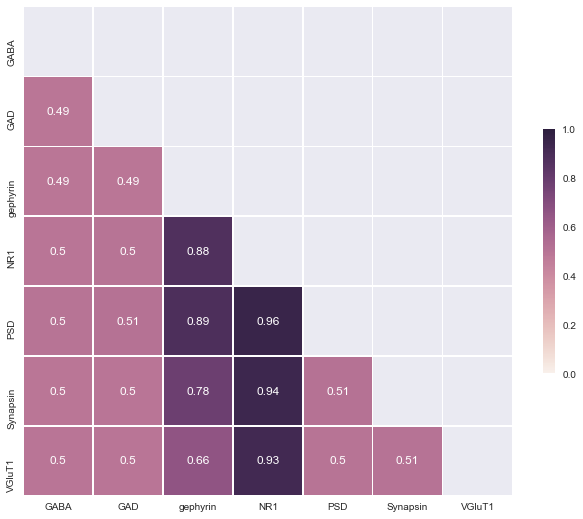

In [16]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(lda_out_sample_score_df, mask=mask, vmin=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

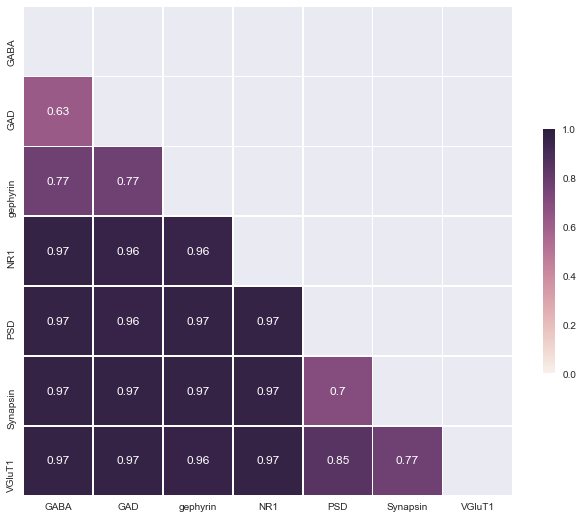

In [17]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(qda_out_sample_score_df, mask=mask, vmin=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [18]:
#Compute scores for LDA and QDA using collman14v2 as training data and collman15v2 as test data
for i, j in pairs:
    lda_in_sample_scores = []
    lda_out_sample_scores = []
    qda_in_sample_scores = []
    qda_out_sample_scores = []
    
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    
    X = collman14v2.iloc[:, i:j+1].values #Data
    y = collman14v2.iloc[:, -1].values #Labels
    
    X2 = collman15v2.iloc[:, i:j+1].values
    y2 = collman15v2.iloc[:, -1].values
    
    skf = RepeatedStratifiedKFold(n_splits=3, random_state=np.random.RandomState()) # 66% train, 33% test
    for train, test in skf.split(X, y):
        lda.fit(X[train], y[train])
        qda.fit(X[train], y[train])
        
        lda_in_sample_scores.append(lda.score(X[test], y[test]))
        lda_out_sample_scores.append(lda.score(X2, y2))
        qda_in_sample_scores.append(qda.score(X[test], y[test]))
        qda_out_sample_scores.append(qda.score(X2, y2))
        
    skf = RepeatedStratifiedKFold(n_splits=3, random_state=np.random.RandomState()) # 33% train, 66% test
    for test, train in skf.split(X, y):
        lda.fit(X[train], y[train])
        qda.fit(X[train], y[train])
        
        lda_in_sample_scores.append(lda.score(X[test], y[test]))
        lda_out_sample_scores.append(lda.score(X2, y2))
        qda_in_sample_scores.append(qda.score(X[test], y[test]))
        qda_out_sample_scores.append(qda.score(X2, y2))
    
    skf = RepeatedStratifiedKFold(n_splits=2, random_state=np.random.RandomState()) # 50% train, 50% test
    for train, test in skf.split(X, y):
        lda.fit(X[train], y[train])
        qda.fit(X[train], y[train])
        
        lda_in_sample_scores.append(lda.score(X[test], y[test]))
        lda_out_sample_scores.append(lda.score(X2, y2))
        qda_in_sample_scores.append(qda.score(X[test], y[test]))
        qda_out_sample_scores.append(qda.score(X2, y2))
    
    lda_in_sample_score_matrix[((i, j), (j, i))] = np.mean(lda_in_sample_scores)
    lda_out_sample_score_matrix[((i, j), (j, i))] = np.mean(lda_out_sample_scores)
    
    qda_in_sample_score_matrix[((i, j), (j, i))] = np.mean(qda_in_sample_scores)
    qda_out_sample_score_matrix[((i, j), (j, i))] = np.mean(qda_out_sample_scores)

In [19]:
#LDA in sample scores
pd.DataFrame(lda_in_sample_score_matrix, index=columns[:-1], columns=columns[:-1])

,GABA,GAD,gephyrin,NR1,PSD,Synapsin,VGluT1
GABA,1.000000,0.949986,0.943928,0.948876,0.949619,0.950788,0.950659
GAD,0.949986,1.000000,0.942572,0.948724,0.949029,0.950384,0.950444
gephyrin,0.943928,0.942572,1.000000,0.944766,0.946587,0.947914,0.947792
NR1,0.948876,0.948724,0.944766,1.000000,0.947999,0.949127,0.949028
PSD,0.949619,0.949029,0.946587,0.947999,1.000000,0.910176,0.930489
Synapsin,0.950788,0.950384,0.947914,0.949127,0.910176,1.000000,0.930474
VGluT1,0.950659,0.950444,0.947792,0.949028,0.930489,0.930474,1.000000


In [20]:
#QDA in sample scores
pd.DataFrame(qda_in_sample_score_matrix, index=columns[:-1], columns=columns[:-1])

,GABA,GAD,gephyrin,NR1,PSD,Synapsin,VGluT1
GABA,1.000000,0.977253,0.975299,0.973608,0.972357,0.972327,0.972716
GAD,0.977253,1.000000,0.975585,0.973705,0.972673,0.972061,0.972637
gephyrin,0.975299,0.975585,1.000000,0.969635,0.970454,0.968387,0.969603
NR1,0.973608,0.973705,0.969635,1.000000,0.963028,0.965830,0.971432
PSD,0.972357,0.972673,0.970454,0.963028,1.000000,0.940992,0.967270
Synapsin,0.972327,0.972061,0.968387,0.965830,0.940992,1.000000,0.965256
VGluT1,0.972716,0.972637,0.969603,0.971432,0.967270,0.965256,1.000000


In [21]:
qda_out_sample_score_df = pd.DataFrame(qda_out_sample_score_matrix, index=columns[:-1], columns=columns[:-1])

lda_out_sample_score_df = pd.DataFrame(lda_out_sample_score_matrix, index=columns[:-1], columns=columns[:-1])

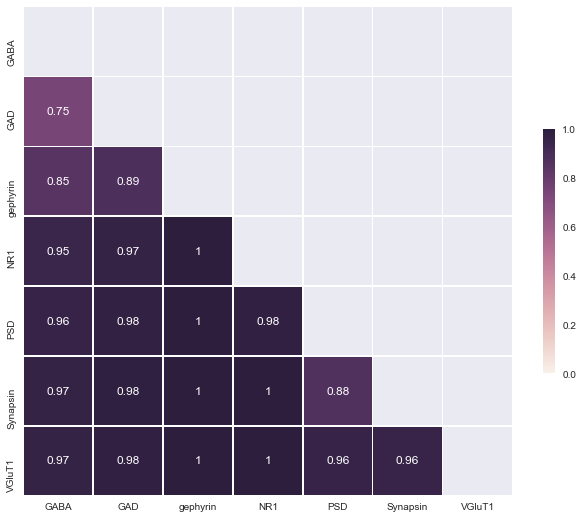

In [22]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(lda_out_sample_score_df, mask=mask, vmin=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

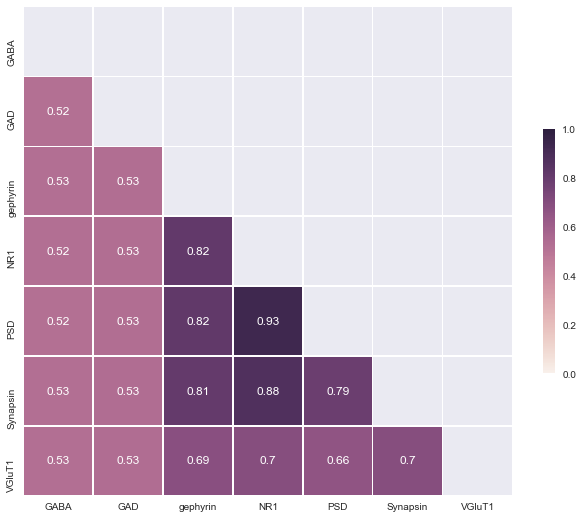

In [23]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(qda_out_sample_score_df, mask=mask, vmin=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()